# Import Libraries

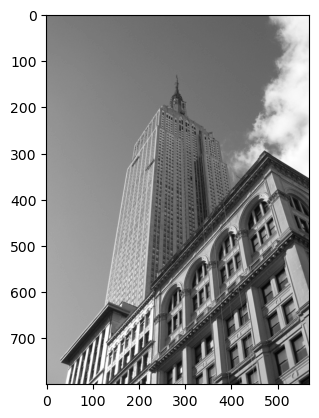

In [174]:
import numpy as np 
import cv2 as cv 
from matplotlib import pyplot as plt 
img = cv.imread('empire.jpg') # load image 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
plt.imshow(img_gray, 'gray')

# Harris corner detector

In [177]:
local_region_size = 3 # i.e., W=3x3, see slide 6 in week 3 handout 
kernel_size = 3 # Sobel kernel’s size used to calculate horizontal/vertical derivatives 
k = 0.04 # parameter k in side 6 in week 3 handout 
threshold = 1000.0 #threshold theta introduced in slide 6 in week 3 handout 

In [179]:
img_gray = np.float32(img_gray) 

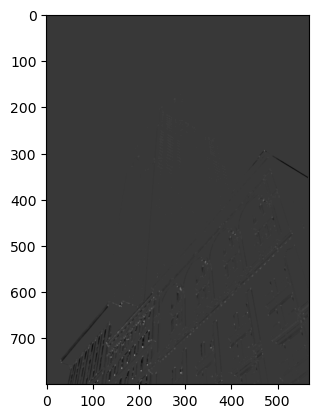

In [181]:
Harris_res_img = cv.cornerHarris(img_gray, local_region_size, kernel_size, k) 
plt.imshow(Harris_res_img, 'gray')

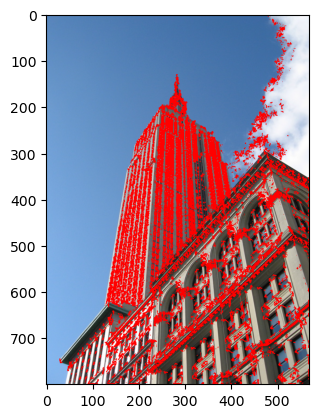

In [183]:
highlighted_colour = [0, 0, 255] # Blue:0, Green:0, Red: 255 
highlighted_img = img.copy() 
highlighted_img[Harris_res_img > threshold] = highlighted_colour 
plt.imshow(cv.cvtColor(highlighted_img, cv.COLOR_BGR2RGB)) # RGB-> BGR

In [185]:
print("Number of detected corners: ")
print(np.sum(Harris_res_img > threshold))

Number of detected corners: 
87282


### 0.1% Threshold

94003.416
Number of detected corners: 
39280


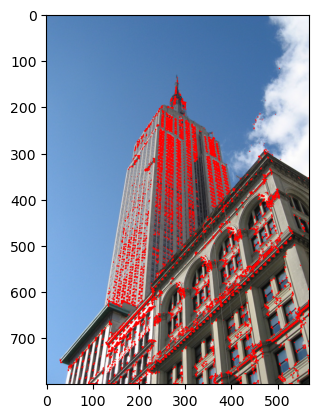

In [188]:
ratio = 0.001 # 0.1%   
threshold = ratio * Harris_res_img.max() 
print(threshold) 

highlighted_img = img.copy() 
highlighted_img[Harris_res_img > threshold] = highlighted_colour 
plt.imshow(cv.cvtColor(highlighted_img, cv.COLOR_BGR2RGB)) # RGB-> BGR

print("Number of detected corners: ")
print(np.sum(Harris_res_img > threshold))

### 0.5% Threshold

470017.08
Number of detected corners: 
18163


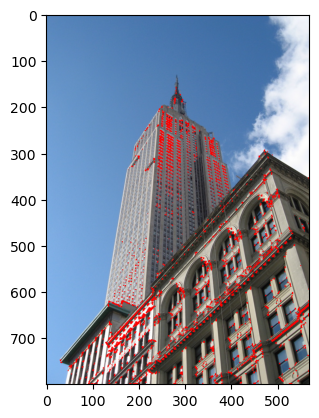

In [191]:
ratio = 0.005 # 0.5%   
threshold = ratio * Harris_res_img.max() 
print(threshold) 

highlighted_img = img.copy() 
highlighted_img[Harris_res_img > threshold] = highlighted_colour 
plt.imshow(cv.cvtColor(highlighted_img, cv.COLOR_BGR2RGB)) # RGB-> BGR

print("Number of detected corners: ")
print(np.sum(Harris_res_img > threshold))

### 1% Threshold

940034.16
Number of detected corners: 
10896


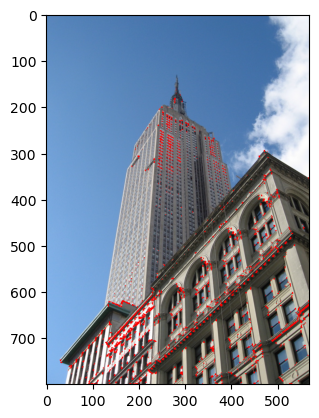

In [199]:
ratio = 0.01 # 1%   
threshold = ratio * Harris_res_img.max() 
print(threshold) 

highlighted_img = img.copy() 
highlighted_img[Harris_res_img > threshold] = highlighted_colour 
plt.imshow(cv.cvtColor(highlighted_img, cv.COLOR_BGR2RGB)) # RGB-> BGR

print("Number of detected corners: ")
print(np.sum(Harris_res_img > threshold))

# SIFT

In [202]:
sift = cv.SIFT_create() 

In [204]:
# Load the images
img_45 = cv.imread('empire_45.jpg') 
img_zoomedout = cv.imread('empire_zoomedout.jpg') 
img_another = cv.imread('fisherman.jpg') 

#convert the images to grayscale 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY) 
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY) 
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY) 

kp = sift.detect(img_gray, None) 
kp_45 = sift.detect(img_45_gray, None) 
kp_zoomedout = sift.detect(img_zoomedout_gray, None) 
kp_another = sift.detect(img_another_gray, None)

Number of detected keypoints: 2804


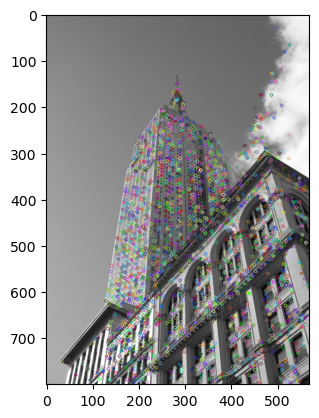

In [206]:
img_gray_kp = img_gray.copy() 
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp) 

plt.imshow(img_gray_kp) 
print("Number of detected keypoints: %d" % (len(kp))) 

(2804, 128)


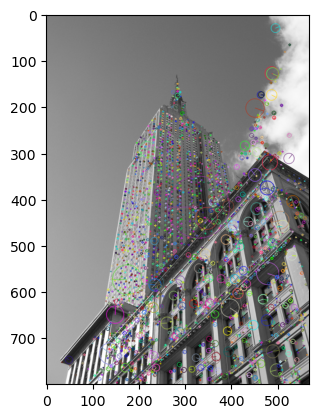

In [208]:
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.imshow(img_gray_kp)

kp, des = sift.compute(img_gray, kp)

print(des.shape)

### Keypoints (with radius and orientations) on empire_45.jpg 

Number of detected keypoints: 3290


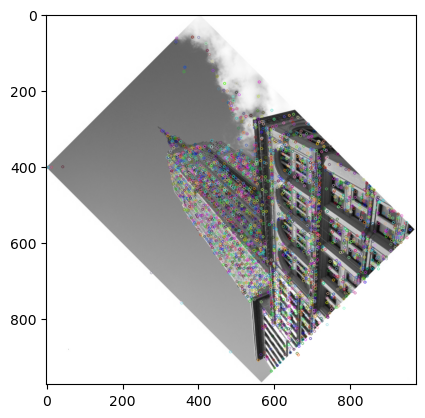

In [211]:
img_45_gray_kp = img_45_gray.copy() 
img_45_gray_kp = cv.drawKeypoints(img_45_gray, kp_45, img_45_gray_kp) 

plt.imshow(img_45_gray_kp) 
print("Number of detected keypoints: %d" % (len(kp_45))) 

(3290, 128)


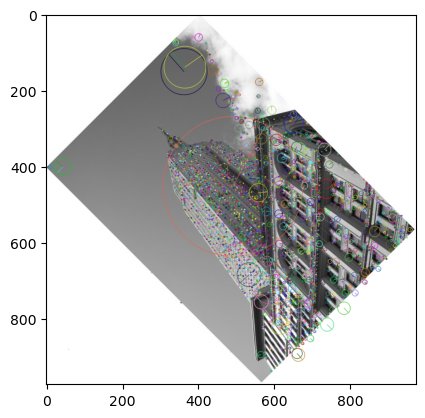

In [213]:
img_45_gray_kp = cv.drawKeypoints(img_45_gray, kp_45, img_45_gray_kp, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.imshow(img_45_gray_kp)

kp, des = sift.compute(img_45_gray, kp_45)

print(des.shape)

### Keypoints (with radius and orientations) on empire_zoomedout.jpg 

Number of detected keypoints: 1841


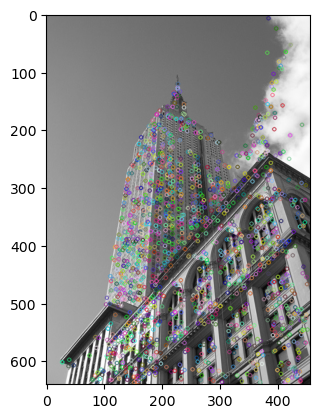

In [216]:
img_zoomedout_gray_kp = img_zoomedout_gray.copy() 
img_zoomedout_gray_kp = cv.drawKeypoints(img_zoomedout_gray, kp_zoomedout, img_zoomedout_gray_kp) 

plt.imshow(img_zoomedout_gray_kp) 
print("Number of detected keypoints: %d" % (len(kp_zoomedout))) 

(1841, 128)


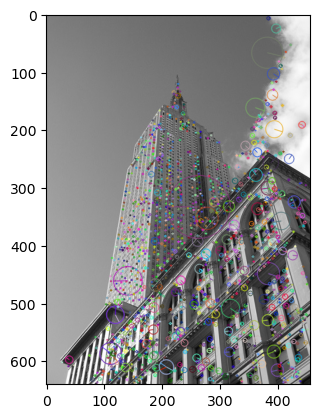

In [220]:
img_zoomedout_gray_kp = cv.drawKeypoints(img_zoomedout_gray, kp_zoomedout, img_zoomedout_gray_kp, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.imshow(img_zoomedout_gray_kp)

kp, des = sift.compute(img_zoomedout_gray, kp_zoomedout)

print(des.shape)

### Keypoints (with radius and orientations) on fisherman.jpg 

Number of detected keypoints: 1172


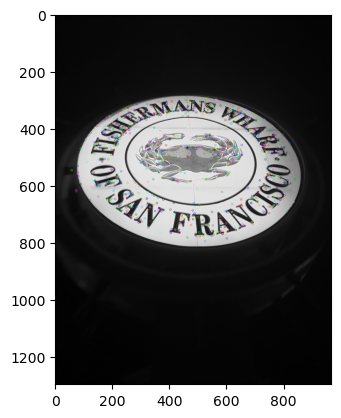

In [223]:
img_another_gray_kp = img_another_gray.copy() 
img_another_gray_kp = cv.drawKeypoints(img_another_gray, kp_another, img_another_gray_kp) 

plt.imshow(img_another_gray_kp) 
print("Number of detected keypoints: %d" % (len(kp_another))) 

(1172, 128)


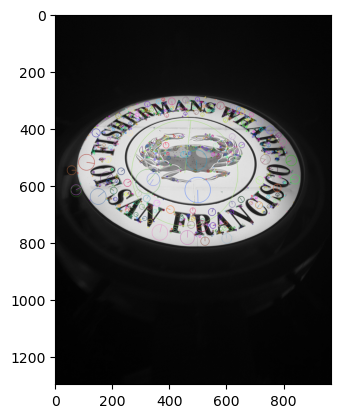

In [225]:
img_another_gray_kp = cv.drawKeypoints(img_another_gray, kp_another, img_another_gray_kp, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.imshow(img_another_gray_kp)

kp, des = sift.compute(img_another_gray, kp_another)

print(des.shape)

### Image matching using SIFT 

In [228]:
#extract keypoints and descriptors 
kp, des = sift.detectAndCompute(img_gray, None)
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None) 
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None) 
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

### empire.jpg vs empire_45.jpg with nBestMatches=10

In [231]:
# Initialise a brute force matcher with default params 
bf = cv.BFMatcher() 
train = des_45 
query = des 
matches_des_des_45 = bf.match(query, train) 

In [233]:
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance) 

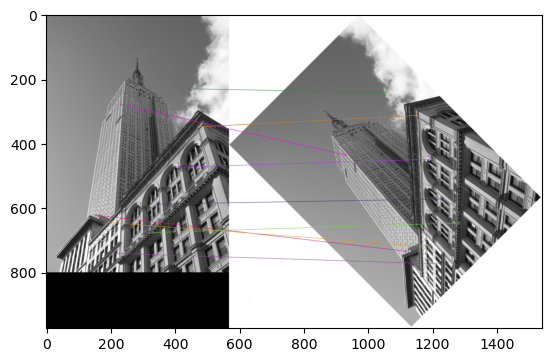

In [235]:
 # Draw the best 10 matches. 
nBestMatches = 10 
matching_des_des_45 = cv.drawMatches(img_gray, kp, img_45_gray, kp_45,  
                              matches_des_des_45[:nBestMatches],  
                              None,  
                              flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.imshow(matching_des_des_45)

In [237]:
kp_train = kp_45 
kp_query = kp 
for i in range (0, nBestMatches): 
    print("match ", i, " info") 
    print("\tdistance:", matches_des_des_45[i].distance) 
    print("\tkeypoint in train: ID:", matches_des_des_45[i].trainIdx, " x:",  
          kp_train[matches_des_des_45[i].trainIdx].pt[0], " y:",  
          kp_train[matches_des_des_45[i].trainIdx].pt[1]) 
    print("\tkeypoint in query: ID:", matches_des_des_45[i].queryIdx, " x:",  
          kp_query[matches_des_des_45[i].queryIdx].pt[0], " y:",  
          kp_query[matches_des_des_45[i].queryIdx].pt[1]) 

match  0  info
	distance: 9.380831718444824
	keypoint in train: ID: 2443  x: 677.6953125  y: 773.8290405273438
	keypoint in query: ID: 661  x: 215.93624877929688  y: 740.7075805664062
match  1  info
	distance: 9.69536018371582
	keypoint in train: ID: 2356  x: 663.0458984375  y: 571.4856567382812
	keypoint in query: ID: 1721  x: 348.70166015625  y: 587.2408447265625
match  2  info
	distance: 11.747340202331543
	keypoint in train: ID: 963  x: 487.35565185546875  y: 240.7156524658203
	keypoint in query: ID: 2328  x: 458.2903137207031  y: 229.1184844970703
match  3  info
	distance: 12.206555366516113
	keypoint in train: ID: 2080  x: 624.6529541015625  y: 447.94830322265625
	keypoint in query: ID: 2090  x: 408.8612060546875  y: 472.7430419921875
match  4  info
	distance: 12.961481094360352
	keypoint in train: ID: 1525  x: 549.5103759765625  y: 733.6979370117188
	keypoint in query: ID: 101  x: 153.57798767089844  y: 621.6637573242188
match  5  info
	distance: 13.0
	keypoint in train: ID: 175

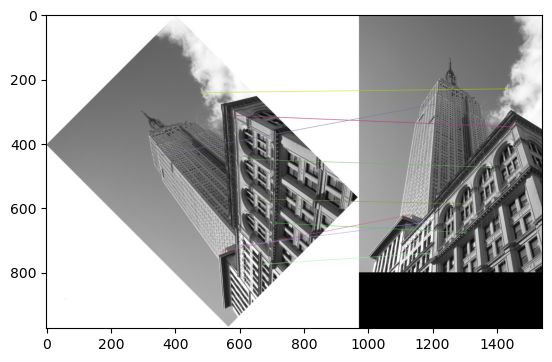

In [242]:
matches_des_45_des = bf.match(des_45, des) 
matches_des_45_des = sorted(matches_des_45_des, key = lambda x:x.distance) 
matching_des_45_des = cv.drawMatches(img_45_gray, kp_45, img_gray, kp,  
                              matches_des_45_des[:nBestMatches],  
                              None,  
                              flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.imshow(matching_des_45_des) 

### empire.jpg vs empire_zoomedout.jpg with nBestMatches=10

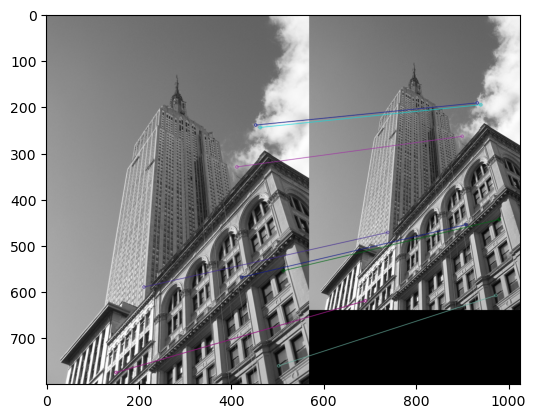

In [245]:
matches_des_des_zoomedout = bf.match(des, des_zoomedout) 
matches_des_des_zoomedout = sorted(matches_des_des_zoomedout, key = lambda x:x.distance) 
matching_des_des_zoomedout = cv.drawMatches(img_gray, kp, img_zoomedout_gray, kp_zoomedout,  
                              matches_des_des_zoomedout[:nBestMatches],  
                              None,  
                              flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.imshow(matching_des_des_zoomedout) 

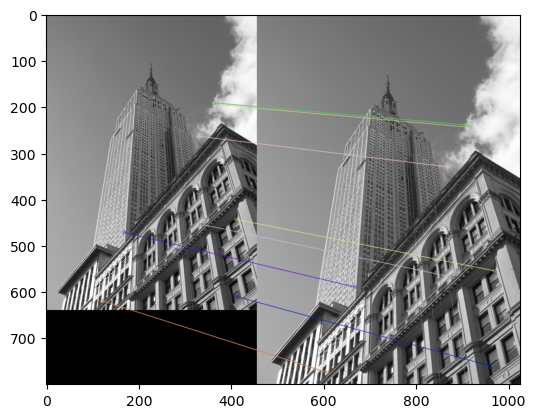

In [250]:
matches_des_zoomedout_des = bf.match(des_zoomedout, des) 
matches_des_zoomedout_des = sorted(matches_des_zoomedout_des, key = lambda x:x.distance) 
matching_des_zoomedout_des = cv.drawMatches(img_zoomedout_gray, kp_zoomedout, img_gray, kp,  
                              matches_des_zoomedout_des[:nBestMatches],  
                              None,  
                              flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.imshow(matching_des_zoomedout_des) 

### empire.jpg vs fisherman.jpg with nBestMatches=10

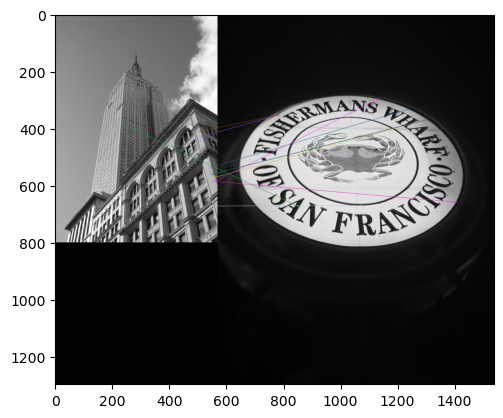

In [253]:
matches_des_des_another = bf.match(des, des_another) 
matches_des_des_another = sorted(matches_des_des_another, key = lambda x:x.distance) 
matching_des_des_another = cv.drawMatches(img_gray, kp, img_another_gray, kp_another,  
                              matches_des_des_another[:nBestMatches],  
                              None,  
                              flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.imshow(matching_des_des_another) 

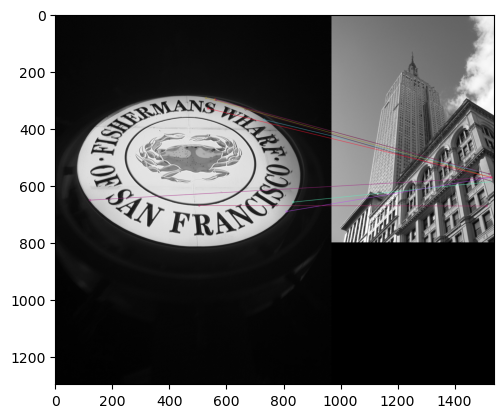

In [258]:
matches_des_another_des = bf.match(des_another, des) 
matches_des_another_des = sorted(matches_des_another_des, key = lambda x:x.distance) 
matching_des_another_des = cv.drawMatches(img_another_gray, kp_another, img_gray, kp,  
                              matches_des_another_des[:nBestMatches],  
                              None,  
                              flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.imshow(matching_des_another_des) 

### Dissimilarity calculator

In [261]:
def calculateDissimilarity(matches_query, matches_train, nBestMatches):
    distance = 0
    min_bestMatches = np.min([nBestMatches, len(matches_query), len(matches_train)])
    for i in range(min_bestMatches):
        distance += matches_query[i].distance + matches_train[i].distance
    return distance / 2

### 10 best matches

In [264]:
print("empire vs empire 45:", calculateDissimilarity(matches_des_des_45, matches_des_45_des, 10))
print("empire vs empire zoomedout:", calculateDissimilarity(matches_des_des_zoomedout, matches_des_zoomedout_des, 10))
print("empire vs fisherman:", calculateDissimilarity(matches_des_des_another, matches_des_another_des, 10))

empire vs empire 45: 126.06704616546631
empire vs empire zoomedout: 114.81388759613037
empire vs fisherman: 861.1744499206543


### 50 best matches

In [267]:
print("empire vs empire 45:", calculateDissimilarity(matches_des_des_45, matches_des_45_des, 50))
print("empire vs empire zoomedout:", calculateDissimilarity(matches_des_des_zoomedout, matches_des_zoomedout_des, 50))
print("empire vs empire fisherman:", calculateDissimilarity(matches_des_des_another, matches_des_another_des, 50))

empire vs empire 45: 920.1556854248047
empire vs empire zoomedout: 839.6173696517944
empire vs empire fisherman: 6909.1140213012695


### 100 best matches

In [270]:
print("empire vs empire 45:", calculateDissimilarity(matches_des_des_45, matches_des_45_des, 100))
print("empire vs empire zoomedout:", calculateDissimilarity(matches_des_des_zoomedout, matches_des_zoomedout_des, 100))
print("empire vs fisherman:", calculateDissimilarity(matches_des_des_another, matches_des_another_des, 100))

empire vs empire 45: 2133.9572887420654
empire vs empire zoomedout: 2003.75674533844
empire vs fisherman: 17156.097869873047
